In [1]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('C:\\Users\\Chenxi\\Desktop\\ipython\\train.csv')

# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [3]:

# All good data analysis projects begin with 
#trying to answer questions.
#Now that we know what column category data 
#we have let's think of some questions 
#or insights we would like to obtain from the data. 
#So here's a list of questions 
#we'll try to answer using our new data analysis skills!

In [5]:
# First some basic questions:

# 1.) Who were the passengers on the Titanic? 
        #(Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on 
#   and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?

In [6]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

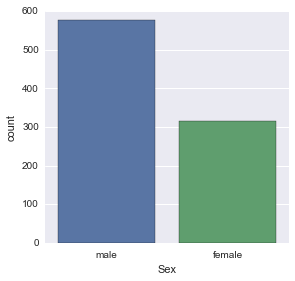

In [7]:
# Let's first check gender
sns.factorplot('Sex',data=titanic_df,kind="count")

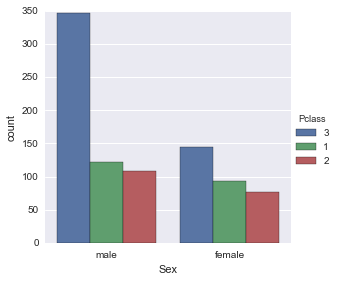

In [8]:
#We want to see classes distribution by each sex 
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind="count")



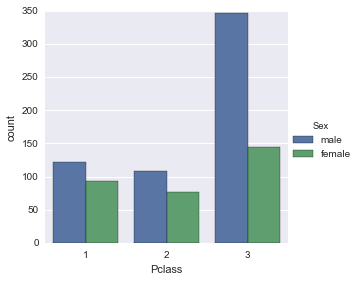

In [9]:
# Now let's seperate the genders by classes. 
#We can use the 'hue' arguement here!
sns.factorplot('Pclass',data=titanic_df,order=np.arange(1, 4),hue='Sex',kind="count")



In [10]:
# Most of the males are in the 3rd class and 
# It looks relatively even in both 1st and 2nd classes data dist

In [108]:

#There is a general social rule--
#Children Woman need to survive first
# We'll treat anyone as under 16 as a child, 
#and then use the apply technique 
#with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.
# Mark up the "child" or "sex" column
# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

def survival_In_Cabin(passenger):
    survived,cabin = passenger
    if survived == 1:
        return cabin
titanic_df['Survived_In_Cabin'] = titanic_df[['Survived','Cabin']].apply(survival_In_Cabin,axis=1)    

In [109]:
# check out the first ten rows
titanic_df[0:11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Survival_in_Carbin,Survival_in_Cabin,Survived_in_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,None,None,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no,None,None,None
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,None,None,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,no,None,None,None
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With Family,no,None,None,None
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With Family,yes,NaN,NaN,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With Family,yes,NaN,NaN,NaN


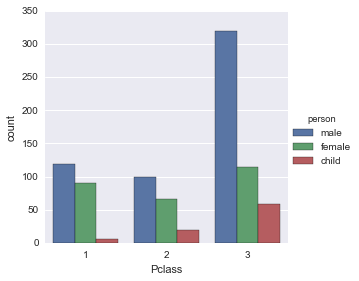

In [13]:
# Let's try the factorplot again!
sns.factorplot('Pclass',data=titanic_df,order=np.arange(1, 4),
               hue='person',kind='count')

In [14]:
# Interesting, quite a bit of children in 3rd class 
# and not so many in 1st! 
#So this is beyond our intuition.
# How about we create a distribution of the ages to 
# get a more precise picture of the who the passengers were.
titanic_df['Age'].mean()

29.69911764705882

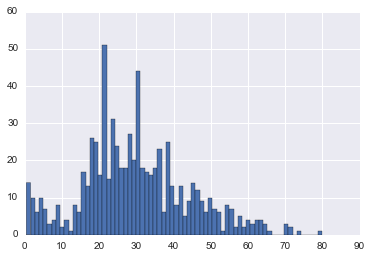

In [15]:
#The mean shows the population is quite young
#create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [16]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


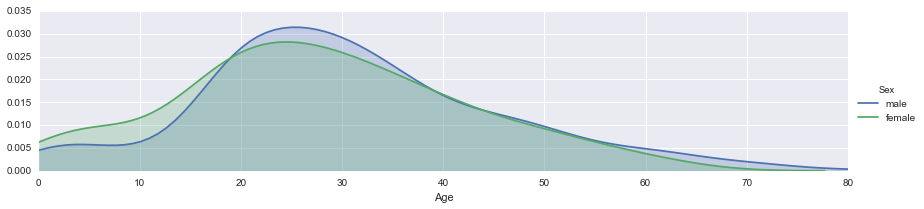

In [17]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
#'Age'set as x axis
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

# legend : bool, optinal
# If True, add a legend or label the axes when possible.

#Finally add a legend
fig.add_legend()

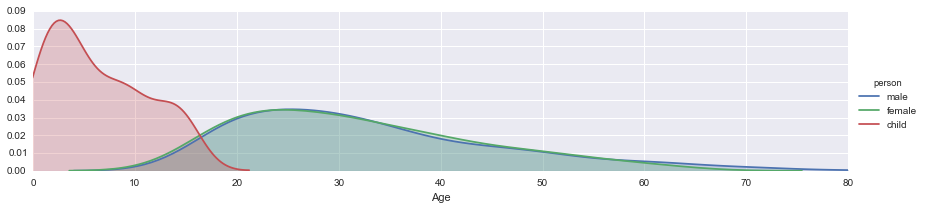

In [18]:
# We could have done the same thing for the 'person' column 
#to include children:
#person is the new added column
#Person has 2 categories: Child or non-child
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


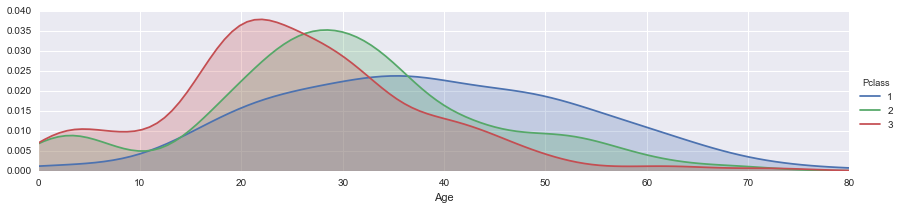

In [19]:
# Let's do the same for class by changing the hue argument:
# careful on the hue_order=np.arange(1, 4)
fig = sns.FacetGrid(titanic_df,hue="Pclass",hue_order=np.arange(1, 4),aspect=4)
fig.map(sns.kdeplot,'Age', shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
# We've gotten a pretty good picture of 
#who the passengers were based on Sex, Age, and Class.
#So let's move on to our 2nd question: 

#What deck were the passengers on 
#and how does that relate to their class?

In [21]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [22]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

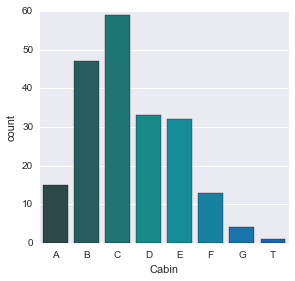

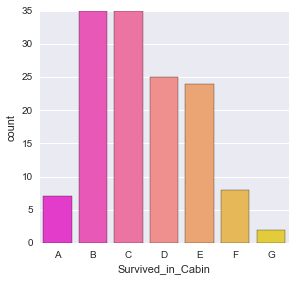

In [112]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    
levels.sort()


#Attention here,arr variables could be sorted
#Yet,a dataframe could not.

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df,kind="count",palette='winter_d')


In [102]:
# Interesting to note we have a 'T' deck value (against the Cabin Order rule)there which doesn't make sense,
# we can drop it out with the following code:

['A', 'B', 'C', 'D', 'E', 'F', 'G'] ['A', 'B', 'C', 'D', 'E', 'F', 'G']


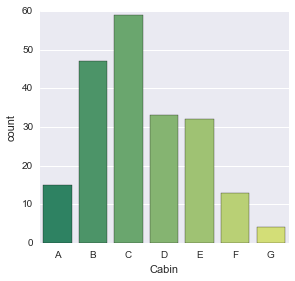

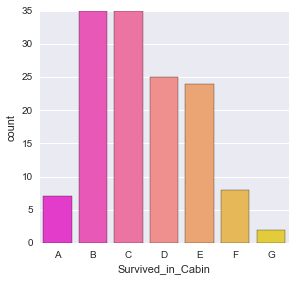

In [149]:
# Redefine cabin_df as everything but where the row was equal to 'T'
#Link: http://matplotlib.org/users/colormaps.html
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,kind="count",palette='summer')

#------------------------------------------


In [129]:
# Great now that we've analyzed the distribution by decks, 
# let's go ahead and answer our third question:

# 3.) Where did the passengers come from?

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [28]:

# Note here that the Embarked column has C,Q,
# and S values. Reading about the project on Kaggle 
# you'll note that these stand for Cherbourg, Queenstown, Southhampton.

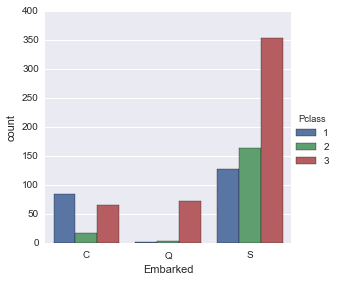

In [31]:
# Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values
sns.factorplot('Embarked',data=titanic_df,kind = 'count',
               hue='Pclass',hue_order=np.arange(1, 4),x_order=['C','Q','S'])

In [86]:
# An interesting find here is that in Queenstown,
# almost all the passengers that boarded there were 3rd class. 

# Now let's take a look at the 4th question:

# 4.) Who was alone and who was with family?

In [32]:
# Let's start by adding a new column to define alone

# sibsp Number of Siblings/Spouses Aboard
# parch Number of Parents/Children Aboard
#so solution--if sum(both-columns) are "0",then that person is alone on broad

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [33]:
# Now we know that if the Alone column is anything but 0, 
# then the passenger had family aboard 
# nd wasn't alone. 
# So let's change the column now 
# so that if the value is greater than 0, 
# we know the passenger was with his/her family, otherwise they were alone.
# Look for >0 or ==0 to set alone status

titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


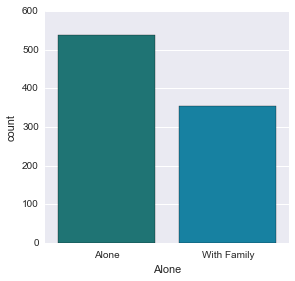

In [67]:
# So let's grab that letter for the deck level with a simple for loop
#sns.factorplot('Alone','With Family',hue='Alone',data=titanic_df,kind='count',palette='Blues')
#the above does not work because data has 2 kinds and it is only in the Alone column
#order=['Alone','With Family']

sns.factorplot(x='Alone',order=['Alone','With Family'],data=titanic_df[titanic_df.Alone.notnull()],kind="count",palette='winter_d')


In [ ]:
# Now that we've throughly analyzed the data 
# let's go ahead and take a look at 
# the most interesting (and open-ended) question: 

#     What factors helped someone survive the sinking?

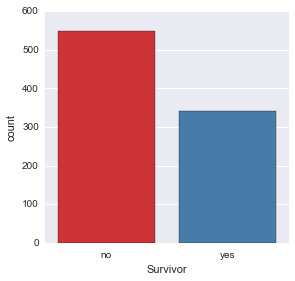

In [69]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,kind='count',palette='Set1')

In [70]:

# So quite a few more people died than those who survived.
# Let's see if the class of the passengers had an effect on their survival rate, 
# since the movie Titanic popularized the notion 
# that the 3rd class passengers did not do as well as 
# their 1st and 2nd class counterparts.

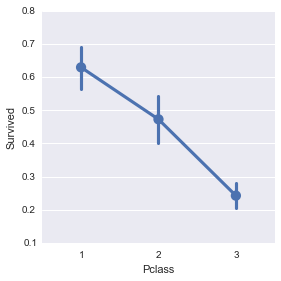

In [72]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',order=np.arange(1, 4),data=titanic_df)

In [73]:
# Look like survival rates for the 3rd class are substantially lower! 
# But maybe this effect is being caused 
# by the large amount of men in the 3rd class 
# in combination with the women and children first policy. 
# We could use 'hue' to get a clearer picture on this.


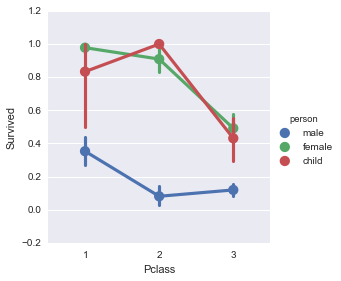

In [75]:
# Let's use a factor plot again, but now considering class 
#and gender with Children effect
sns.factorplot('Pclass','Survived',order=np.arange(1, 4),hue='person',data=titanic_df)

In [76]:
# It seems being a male or being in 3rd class were 
# both not favourable for survival.Yet,being a male
# in any class dramatically decreases your chances of survival.

# But what about age? Did being younger or older have a effect on survival rate?

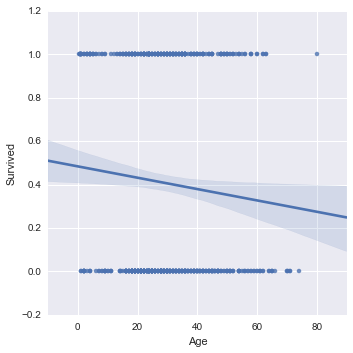

In [77]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

In [80]:
# Looks like there is a general trend that the older the passenger was, 
# the less likely they survived. 
# Let's go ahead and use hue to take a look at the effect of class and age.

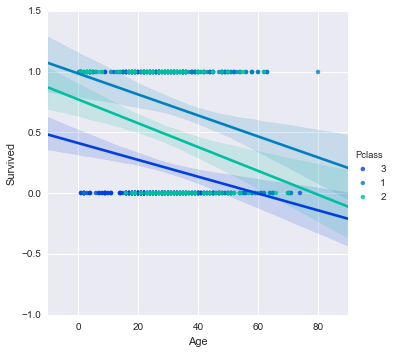

In [81]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')


In [82]:
# We can also use the x_bin argument to clean up this figure 
# and grab the data and bin it by age with a std attached!

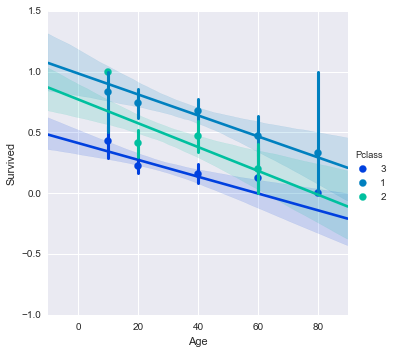

In [85]:
# Let's use a linear plot on age versus survival using hue for class seperation
#x_bins = generation is about the specified time measurement by 20
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',
           data=titanic_df,palette='winter',x_bins=generations)

In [86]:
# We find the older 1st class passengers survived at a better chance!
# Notice that the straight line is the plotline reflecting stat on its means 
# and std dev
# What about if we relate gender and age with the survival set?

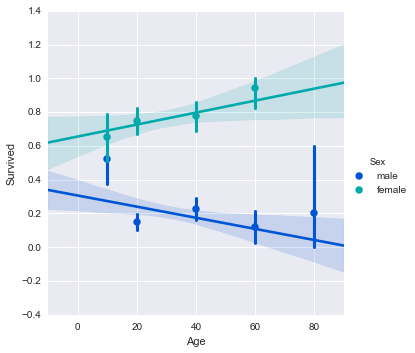

In [87]:
sns.lmplot('Age','Survived',
           hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [89]:
#So,an older female has a better chance at surviving compared with a older male
# we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

# 1.) Did the deck have an effect on the passengers survival rate? 
#    Did this answer match up with your intuition?
# 2.) Did having a family member increase the odds of surviving the crash?


In [155]:
#Did the deck have an effect on the passengers survival rate?
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Pclass                891 non-null int64
Name                  891 non-null object
Sex                   891 non-null object
Age                   714 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Ticket                891 non-null object
Fare                  891 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
person                891 non-null object
Alone                 891 non-null object
Survivor              891 non-null object
Survival_in_Carbin    136 non-null object
Survival_in_Cabin     136 non-null object
Survived_in_Cabin     136 non-null object
dtypes: float64(2), int64(5), object(11)
memory usage: 132.3+ KB


In [196]:
#Probably,however,here,we have missed a lot of data for Cabin,
#so it is inaccurate to answer this question based on the data available on hand




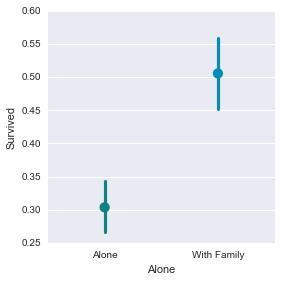

In [206]:
sns.factorplot('Alone','Survived',order=['Alone','With Family'],data=titanic_df[titanic_df.Alone.notnull()],palette='winter_d')




In [207]:
#The above tells that the "Alone" individuals have a lower chance at their survivals


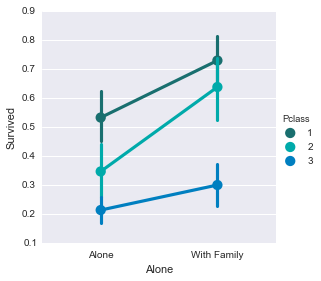

In [210]:
sns.factorplot('Alone','Survived',order=['Alone','With Family'],hue='Pclass',hue_order=np.arange(1,4),data=titanic_df[titanic_df.Alone.notnull()],palette='winter_d')


In [211]:
#This shows a non-3rd class alone passengers survive a higher chance.

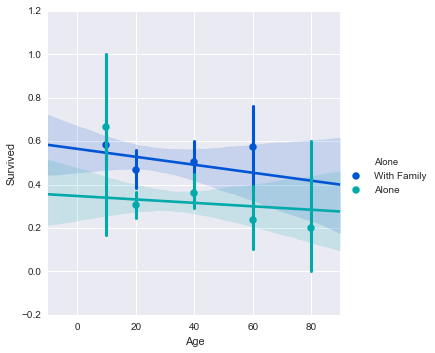

In [213]:
generations=[10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Alone',
           data=titanic_df,palette='winter',x_bins=generations)




In [214]:
# Here,again,as age increases from 20,an individual with family does help his or her 
# survival,whereas a child with a family 
# at or below 10 is less likely to survive compared with the alone peers.
# This is naturual,since a child is requiring a family member seat 
# which is against the child-survival first rule,and thus may enter the saving boat 
# at a later time.
